# Kevin Phung, 47881547 

## Problem 1: Basics of Clustering

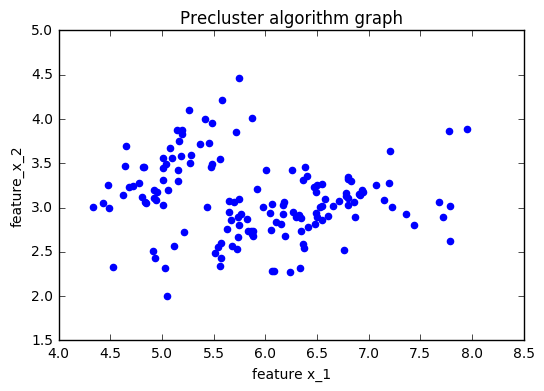

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import scipy.linalg

iris = np.genfromtxt('data/iris.txt', delimiter=None)

X, Y = iris[:,0:2], iris[:,-1]

# Problem 1: Basics of Clustering

# 1A
plt.scatter(X[:,0],X[:,1],color='b')
plt.xlabel('feature x_1')
plt.ylabel('feature_x_2')
plt.title('Precluster algorithm graph')
plt.show()

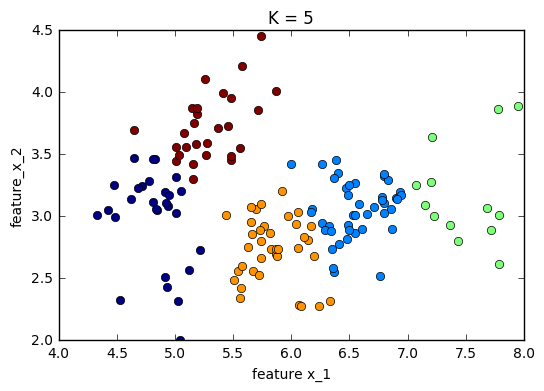

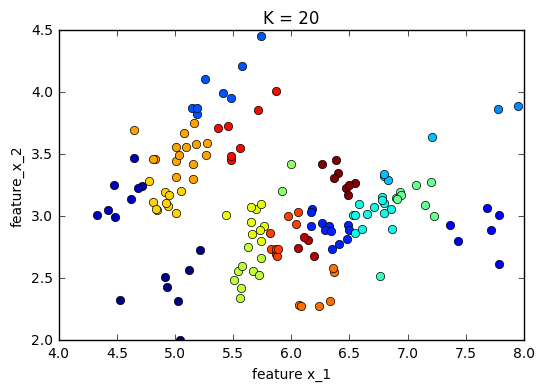

In [3]:
# 1B

z,c,d = ml.cluster.kmeans(X,5)
ml.plotClassify2D(None, X, z)
plt.title('K = 5')
plt.xlabel('feature x_1')
plt.ylabel('feature_x_2')
plt.show()

z,c,d = ml.cluster.kmeans(X,20)
ml.plotClassify2D(None, X, z)
plt.title('K = 20')
plt.xlabel('feature x_1')
plt.ylabel('feature_x_2')
plt.show()


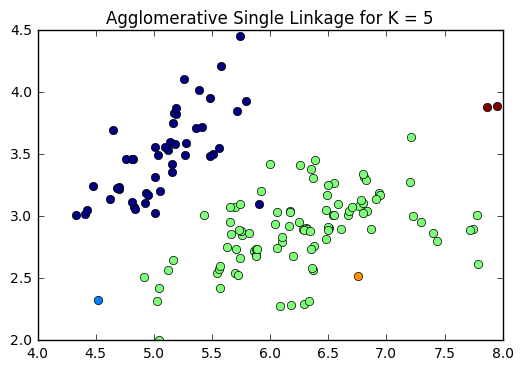

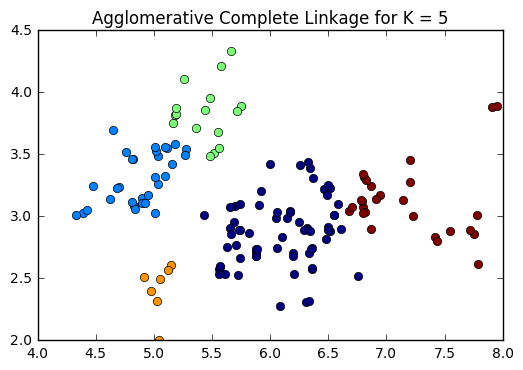

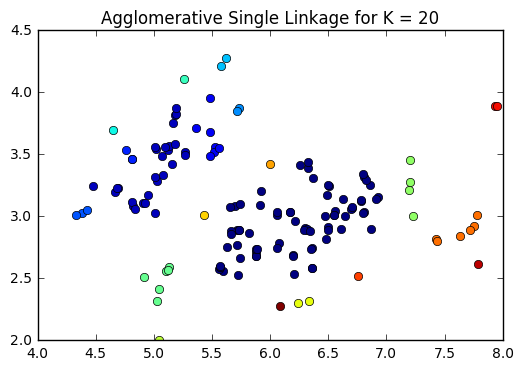

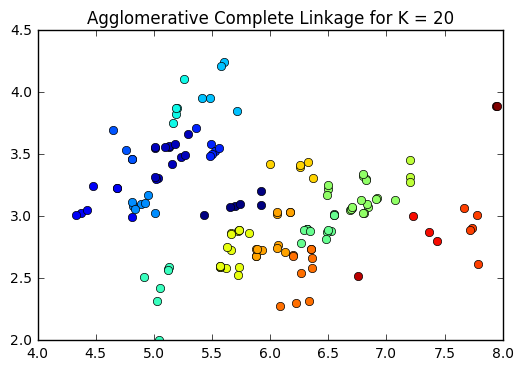

In [4]:
# 1C

z, c = ml.cluster.agglomerative(X, 5, method='min')
plt.title("Agglomerative Single Linkage for K = 5");
ml.plotClassify2D(None, X, z);
plt.show()

z, c = ml.cluster.agglomerative(X, 5, method='max')
plt.title("Agglomerative Complete Linkage for K = 5");
ml.plotClassify2D(None, X, z);
plt.show()

z, c = ml.cluster.agglomerative(X, 20, method='min')
plt.title("Agglomerative Single Linkage for K = 20");
ml.plotClassify2D(None, X, z);
plt.show()

z, c = ml.cluster.agglomerative(X, 20, method='max')
plt.title("Agglomerative Complete Linkage for K = 20");
ml.plotClassify2D(None, X, z);
plt.show()

'''
 The difference between k-means and agglomerative clusters is that
agglomerative clusters are dendograms. If we use minimum distance 
between clusters it will produce a minimum spanning tree while a
maximum distance will avoid elongated clusters. This is shown
in the single and complete linkage for each as single linkage has
a few clusters that take up the majority while the rest are small or
single nodes. K-means base each cluster on a center point. The
initialization of each center may change how the clusters look. 
Distance based or random.
'''

## Problem 2: Eigenfaces

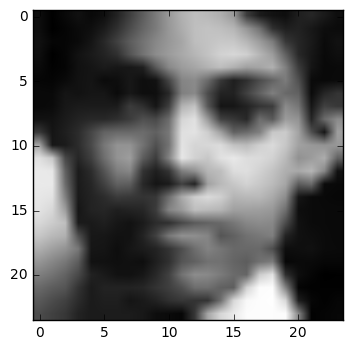

('X0 = ', array([[ -23.26595979,  -19.26595979,  -25.26595979, ...,  -37.26595979,
        -102.26595979, -110.26595979],
       [ -97.26595979, -100.26595979,  -97.26595979, ...,  -38.26595979,
         -75.26595979, -113.26595979],
       [-113.26595979, -111.26595979, -110.26595979, ...,  -54.26595979,
         -56.26595979,  -56.26595979],
       ..., 
       [ -99.26595979,  -99.26595979, -100.26595979, ...,  -91.26595979,
         -89.26595979,  -84.26595979],
       [ -54.26595979,  -52.26595979,  -51.26595979, ...,  -88.26595979,
         -88.26595979,  -88.26595979],
       [ -62.26595979,  -65.26595979,  -64.26595979, ...,  133.73404021,
         132.73404021,  133.73404021]]))


In [5]:
# Problem 2: Eigenfaces
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset
plt.figure()
# pick a data point i for display
img = np.reshape(X[5,:],(24,24)) # convert vectorized data point to 24x24 image patch
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint
plt.show()

# 2A
mean = np.mean(X)
X0 = X-mean

print("X0 = ",X0)


In [6]:
#2B
U, S, V = scipy.linalg.svd(X0, full_matrices=False)
W = U.dot(np.diag(S))


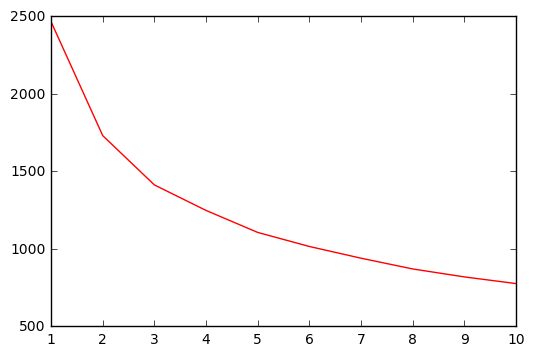

In [7]:
#2C
mse = []
for k in range(1, 11):
    X0hat = W[:, :k].dot(V[:k,:])
    mse.append(np.mean((X0 - X0hat)**2))
# plot the data
_, axis = plt.subplots()
axis.plot(range(1,11), mse, c='red')
axis.set_xticks(range(1,11))
plt.show()

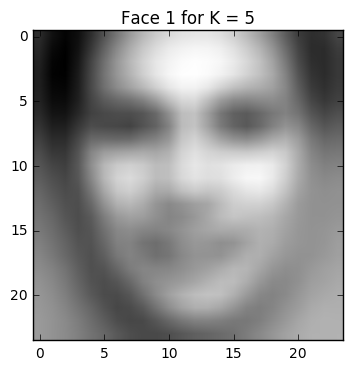

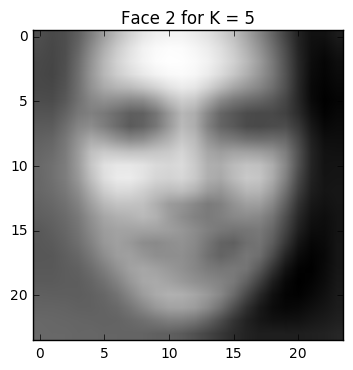

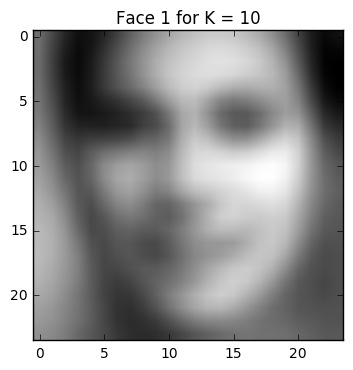

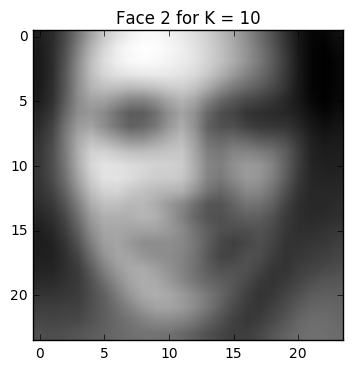

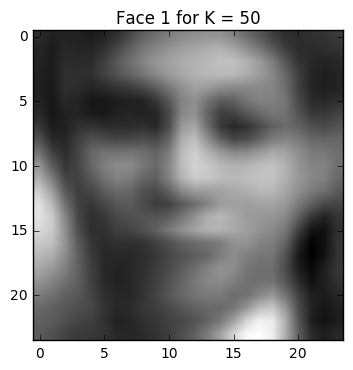

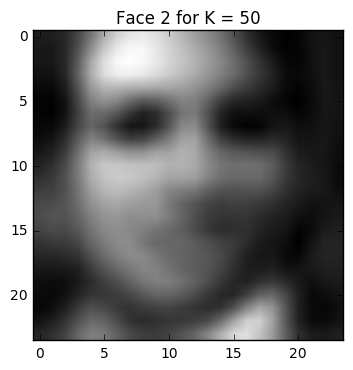

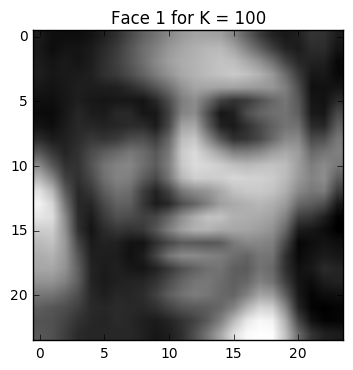

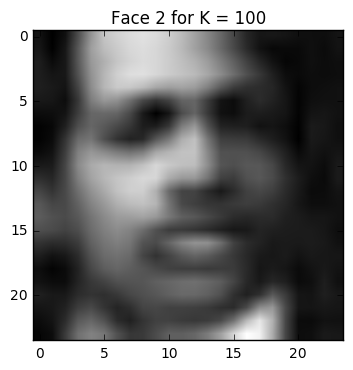

In [8]:
#2D and 2E
K = [5,10,50,100]
for k in K:
    X0hat = W[:, :k].dot(V[:k,:])
    f1 = X0hat[5,:]
    f2 = X0hat[6,:]
    img = np.reshape(f1,(24,24))
    plt.imshow(img.T, cmap="gray")
    plt.title("Face 1 for K = " + str(k))
    plt.show()
    img = np.reshape(f2, (24,24))
    plt.imshow(img.T, cmap="gray")
    plt.title("Face 2 for K = " + str(k))
    plt.show()

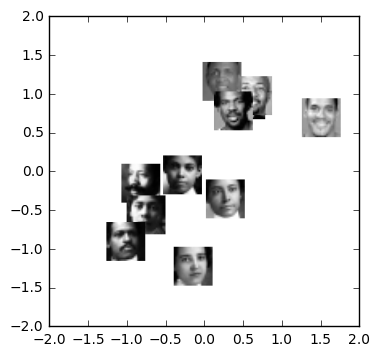

In [9]:
# Problem 2f
idx = [0,1,2,3,4,5,6,7,8,9,10]
coord, params = ml.transforms.rescale(W[:, 0:2])
 # normalize scale of "W" locations
plt.figure()
plt.hold(True)
for i in idx:
    loc = (coord[i,0], coord[i,0] + 0.5, coord[i,1], coord[i, 1] + 0.5) 
    # where to place the image & size
    img = np.reshape(X[i,:], (24,24))
    plt.imshow(img.T, cmap="gray", extent=loc) # draw each image
    plt.axis((-2,2,-2,2))
plt.show()